In [247]:
import pandas as pd
import seaborn as sns

# Understand the DataFrame 

In [248]:
df = pd.read_csv("data/House_Rent_Dataset.csv")
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [249]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [250]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


# Data Cleaning

### Check duplicates

In [251]:
df.duplicated().any()

False

### Drop Outliers

<AxesSubplot:xlabel='Size', ylabel='Rent'>

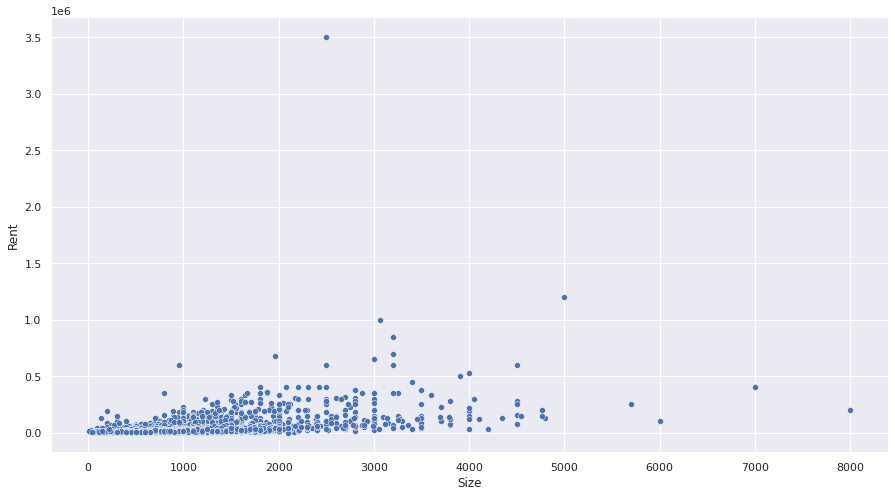

In [252]:
sns.scatterplot(x = df["Size"] , y= df["Rent"])

In [253]:
Q1 = df["Rent"].quantile(0.25)
Q3 = df["Rent"].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df["Rent"]<(Q1-1.5*IQR)) | (df["Rent"] > (Q3 + 1.5*IQR)))]

<AxesSubplot:xlabel='Size', ylabel='Rent'>

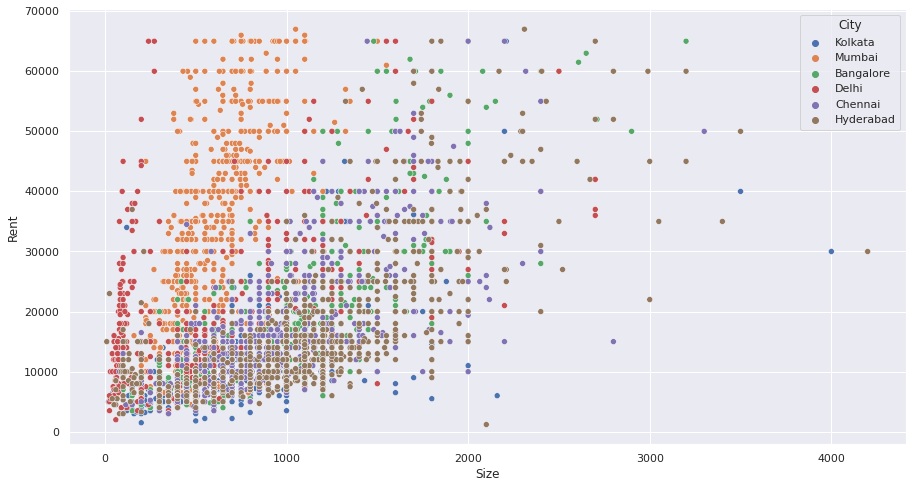

In [254]:
sns.scatterplot(x = df["Size"] , y= df["Rent"], hue = df["City"])

<AxesSubplot:xlabel='City', ylabel='Rent'>

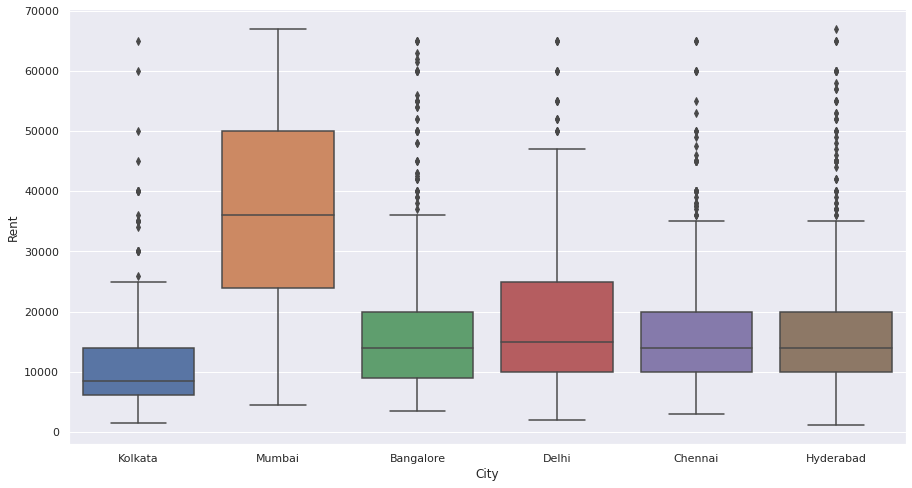

In [255]:
sns.boxplot(x = 'City', y = 'Rent', data = df)

### Drop irrelevent data

In [256]:
df.nunique()

Posted On              80
BHK                     6
Rent                  178
Size                  521
Floor                 340
Area Type               3
Area Locality        1997
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                7
Point of Contact        3
dtype: int64

In [257]:
df = df.drop(["Posted On", "Floor", "Area Locality"], axis =1)

##### Heatmpas

In [258]:
def choose_cat(features):
    features_cat = features.select_dtypes(include="object")
    
    return features_cat

In [259]:
df_dummies = pd.get_dummies(choose_cat(df))
df_dummies

,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
4742,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
4743,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
4744,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0


In [260]:
def choose_numeric(features):
    features_num = features.select_dtypes(exclude="object")

    return features_num

In [261]:
df_heatmap = pd.concat([choose_numeric(df), df_dummies], axis = 1)

<AxesSubplot:>

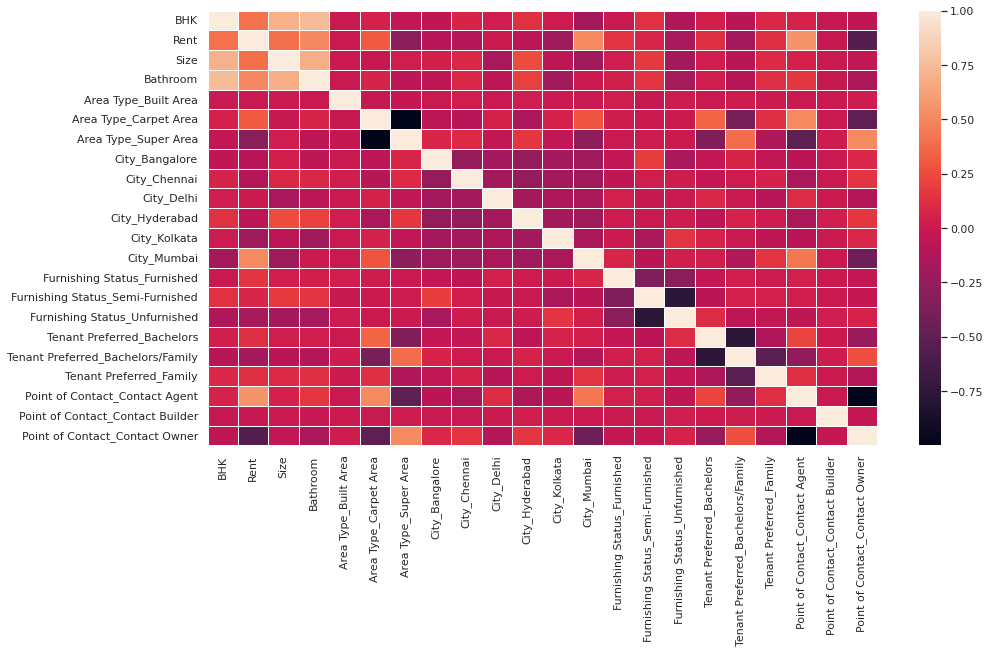

In [262]:
corr = df_heatmap.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, linewidths = 0.5)

##### Check correlation between features

<AxesSubplot:xlabel='Size', ylabel='Rent'>

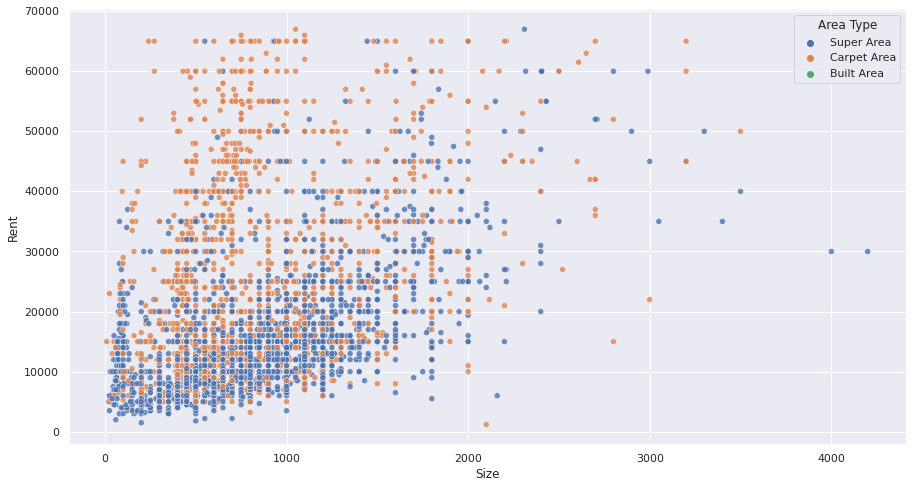

In [263]:
sns.scatterplot(x = df["Size"] , y= df["Rent"], hue = df["Area Type"], alpha = 0.8)

<AxesSubplot:xlabel='Size', ylabel='Rent'>

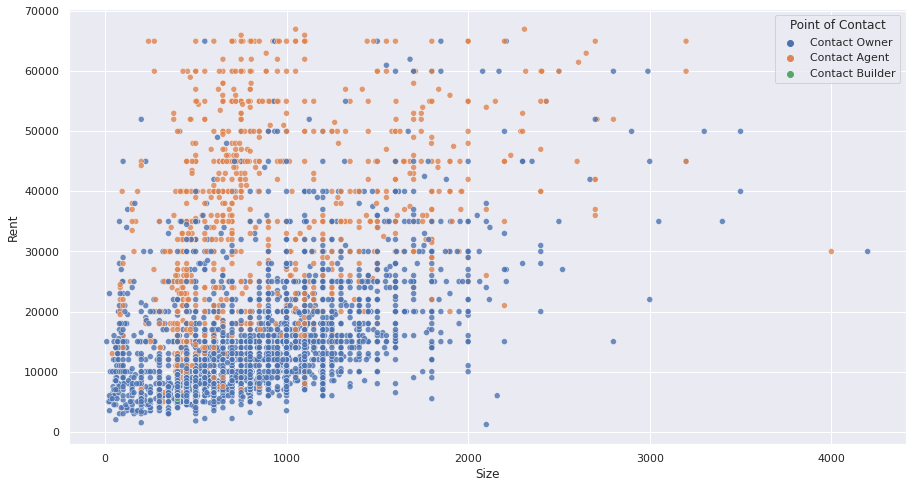

In [264]:
sns.scatterplot(x = df["Size"] , y= df["Rent"], hue = df["Point of Contact"], alpha = 0.8)

<AxesSubplot:xlabel='Size', ylabel='Rent'>

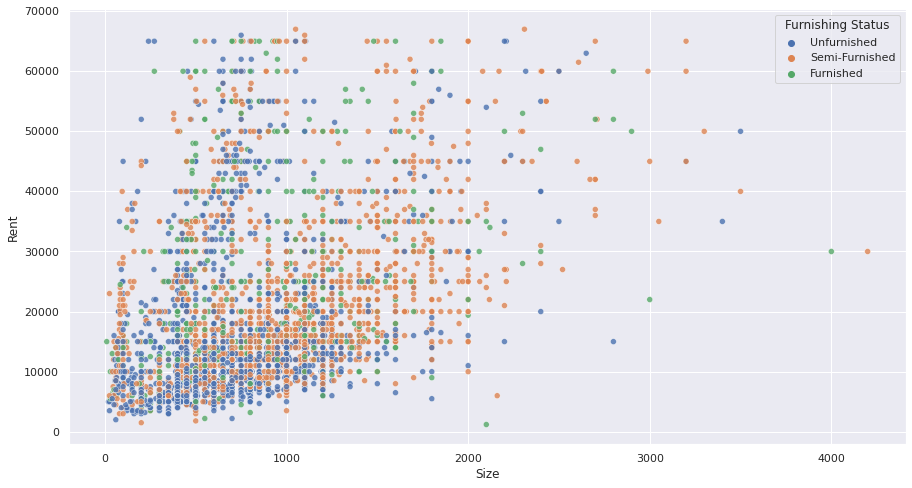

In [265]:
sns.scatterplot(x = df["Size"] , y= df["Rent"], hue = df["Furnishing Status"], alpha = 0.8)

<AxesSubplot:xlabel='Size', ylabel='Rent'>

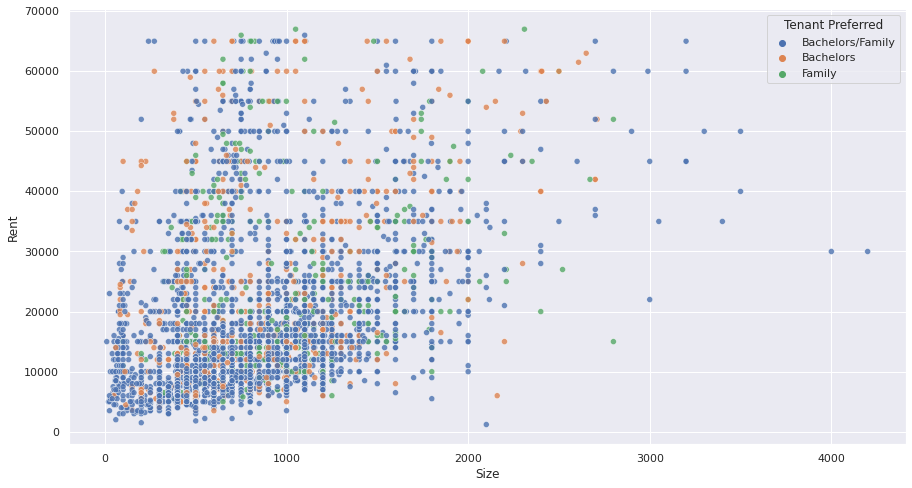

In [266]:
sns.scatterplot(x = df["Size"] , y= df["Rent"], hue = df["Tenant Preferred"], alpha = 0.8)

<AxesSubplot:xlabel='Size', ylabel='Rent'>

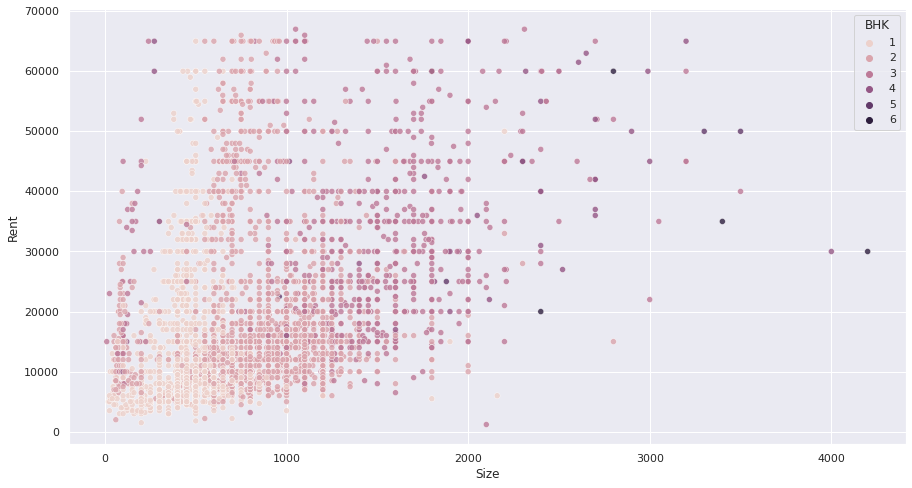

In [267]:
sns.scatterplot(x = df["Size"] , y= df["Rent"], hue = df["BHK"], alpha = 0.8)

<AxesSubplot:xlabel='Size', ylabel='Rent'>

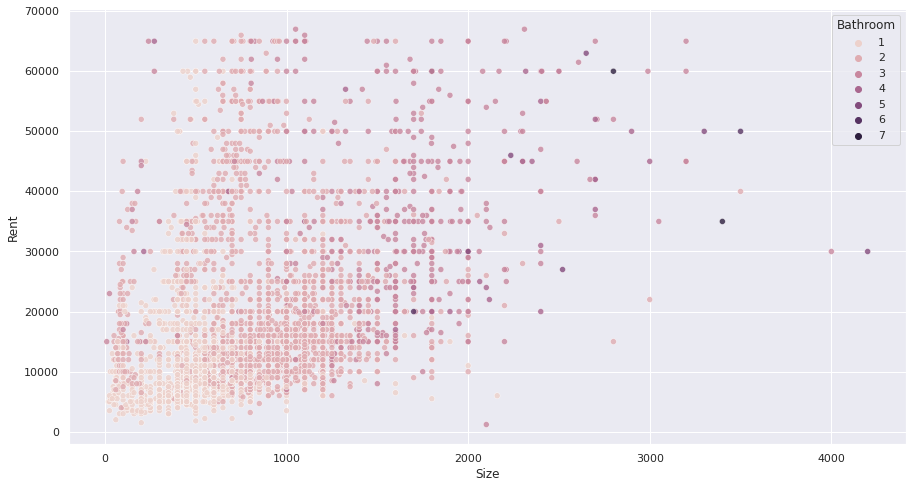

In [268]:
sns.scatterplot(x = df["Size"] , y= df["Rent"], hue = df["Bathroom"], alpha = 0.8)

In [269]:
df = df.drop(["Furnishing Status", "Tenant Preferred", "BHK", "Bathroom", "Point of Contact"], axis =1)

##### Drop under-represented data

In [270]:
df.groupby(["City","Area Type"]).size()


City       Area Type  
Bangalore  Carpet Area    308
           Super Area     543
Chennai    Built Area       1
           Carpet Area    288
           Super Area     561
Delhi      Carpet Area    279
           Super Area     273
Hyderabad  Built Area       1
           Carpet Area    231
           Super Area     613
Kolkata    Carpet Area    263
           Super Area     260
Mumbai     Carpet Area    472
           Super Area     133
dtype: int64

In [271]:
df.drop(df.loc[df["Area Type"] == "Built Area"].index, inplace= True )

# Machine learning

In [362]:
from sklearn.model_selection import train_test_split
y = df["Rent"]
X = df.drop(["Rent"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 6)

### Numeric values Scaling

In [363]:
from sklearn.preprocessing import MinMaxScaler

In [364]:
def choose_numeric(features):
    features_num = features.select_dtypes(exclude="object")

    return features_num

In [365]:
num_scaler = MinMaxScaler()
scaled_num_Xtrain = num_scaler.fit_transform(choose_numeric(X_train))
scaled_num_Xtest = num_scaler.transform(choose_numeric(X_test))


### Categorical values Scaling

In [366]:
from sklearn.preprocessing import OneHotEncoder

In [367]:
def choose_cat(features):
    features_cat = features.select_dtypes(include="object")
    
    return features_cat

In [368]:
cat_scaler = OneHotEncoder(handle_unknown='ignore')

cat_scaled_Xtrain = cat_scaler.fit_transform(choose_cat(X_train))
cat_scaled_Xtest = cat_scaler.transform(choose_cat(X_test))

### Concatenation

In [369]:
scaled_num_Xtrain_df = pd.DataFrame(scaled_num_Xtrain).rename(columns = {0: "size"})
scaled_num_Xtest_df = pd.DataFrame(scaled_num_Xtest).rename(columns={0: "size"})

cat_scaled_Xtrain_df = pd.DataFrame.sparse.from_spmatrix(cat_scaled_Xtrain)
cat_scaled_Xtest_df = pd.DataFrame.sparse.from_spmatrix(cat_scaled_Xtest)

In [370]:
scaled_df_Xtrain = pd.concat([scaled_num_Xtrain_df,cat_scaled_Xtrain_df], axis =1)
scaled_df_Xtest = pd.concat([scaled_num_Xtest_df,cat_scaled_Xtest_df], axis = 1)


In [371]:
#from sklearn.linear_model import Lasso
#lasso = Lasso(alpha=0.2)
#lasso_model = lasso.fit(scaled_df_Xtrain, y_train)
#coef_lasso = pd.Series(lasso.coef_, index = X.columns)
#coef_lasso

### Model : Linear Regression

In [372]:
from sklearn.linear_model import LinearRegression

In [373]:
lr = LinearRegression()

model = lr.fit(scaled_df_Xtrain, y_train)
score = model.score(scaled_df_Xtest, y_test)
score

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.5773399240281245

### Cross Validation

In [374]:
from sklearn.model_selection import cross_validate

score_cv = cross_validate(model, scaled_df_Xtrain, y_train, cv=5)['test_score']
score_cv

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/

array([0.57463788, 0.59723983, 0.54157792, 0.58767811, 0.65100773])

In [375]:
score_mean_cv = score_cv.mean()
score_mean_cv 

0.5904282925540304

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


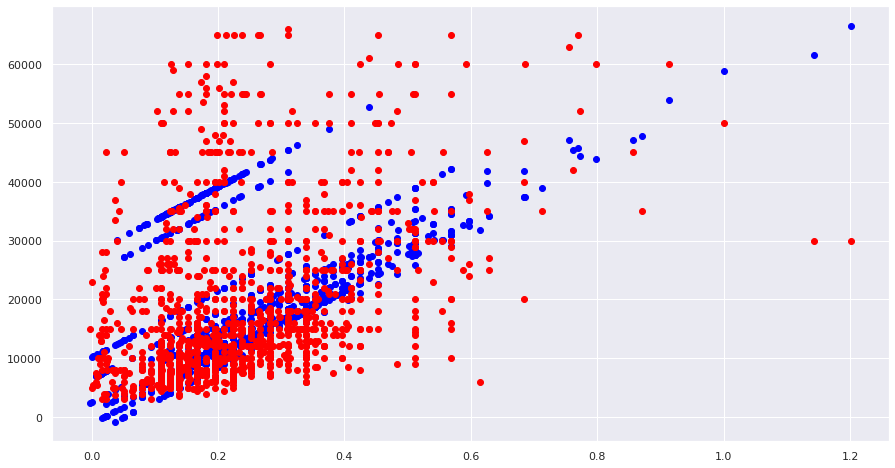

In [393]:
import matplotlib.pyplot as plt

x = scaled_df_Xtest["size"]
y_predit = model.predict(scaled_df_Xtest)

plt.scatter(x, y_predit, c = "blue")
plt.scatter(x, y_test, c ="red")
plt.show()

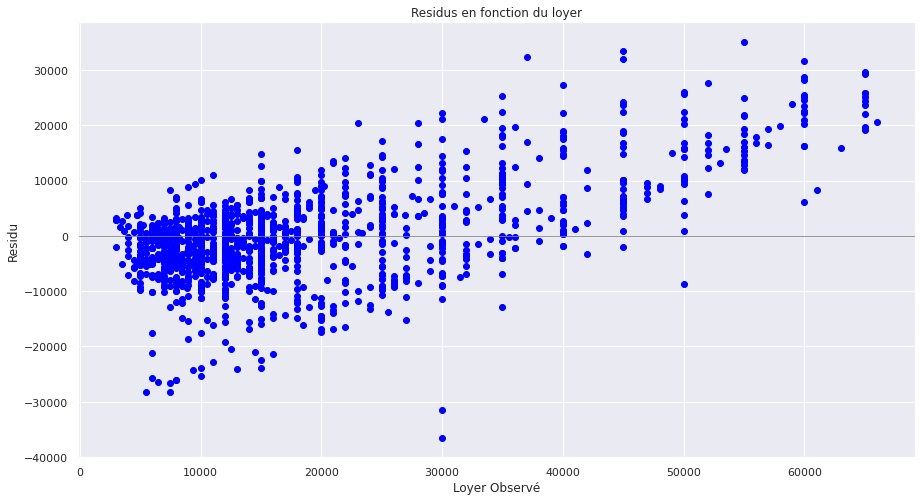

In [395]:
fig, ax = plt.subplots()

x_tip = y_test
error = y_test - y_predit

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Residu')
ax.set_xlabel('Loyer Observé')
ax.set_title('Residus en fonction du loyer')
plt.scatter(x_tip, error , c = "blue")

plt.show()

# Pipeline

In [376]:
from sklearn import set_config
from sklearn.pipeline import make_pipeline

set_config(display='diagram')

### Pipeline Creation

In [377]:
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [378]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

column_scaling = ColumnTransformer([
    ("num_transformation", num_pipeline, selector(dtype_exclude = "object")),
    ("cat_trasformation", cat_pipeline, selector(dtype_include = "object"))
])

In [379]:
column_scaling

ColumnTransformer(transformers=[('num_transformation',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd6118e3e20>),
                                ('cat_trasformation',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd611d1a760>)])

In [380]:
global_pipeline = make_pipeline(
    column_scaling,
    LinearRegression()
)

In [381]:
column_scaling.fit(X_train, y_train)

ColumnTransformer(transformers=[('num_transformation',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd6118e3e20>),
                                ('cat_trasformation',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd611d1a760>)])

In [382]:
global_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformation',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd6118e3e20>),
                                                 ('cat_trasformation',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd611d1a760>)])),
                ('linearregression', LinearRegression())])

### Apply Pipeline

In [383]:
global_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformation',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd6118e3e20>),
                                                 ('cat_trasformation',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd611d1a760>)])),
                ('linearregression', LinearRegression())])

In [384]:
global_pipeline.score(X_test, y_test)

0.5772680492777059

In [385]:
y_pred = global_pipeline.predict(X_test)

In [386]:
residus = y_pred - y_test

<AxesSubplot:xlabel='Rent', ylabel='Count'>

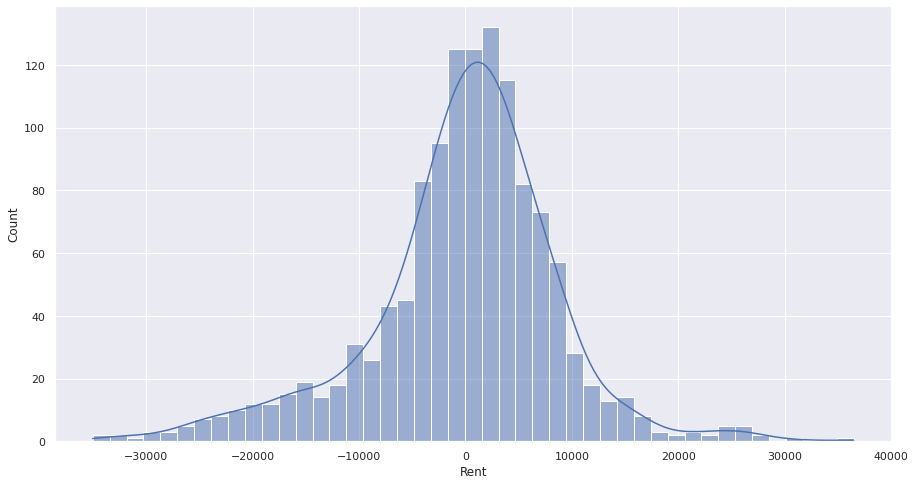

In [396]:
sns.histplot(residus, kde = True)

In [388]:
global_pipeline.fit(X, y)
global_pipeline.score(X, y)

0.5906527373146457

### Save Pipeline

In [389]:
import pickle

pickle.dump(global_pipeline, open("pipline.pkl", "wb"))

In [390]:
pickled_model = pickle.load(open("pipline.pkl", "rb"))
pickled_model.score(X,y)

0.5906527373146457